<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Wiesenberg_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, chi2_contingency

In [159]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-08-17 18:26:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.1’

crx.data.1          100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-08-17 18:26:32 (1012 KB/s) - ‘crx.data.1’ saved [32218/32218]



In [160]:
#create headers list
headers = [f'A{i}' for i in range(1,17)]
headers

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16']

In [161]:
df = pd.read_csv('crx.data', names=headers)
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [162]:
#check for missing values, impute
#they wont show up because they aren't written explicitly as NaN
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [163]:
#find the NaN values
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [164]:
#reparse csv
df = pd.read_csv('crx.data', names=headers, na_values='?')
print(df.shape)
print(df.isna().sum())
df.head()
#found 37 missing values as documentation suggests

(690, 16)
A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [165]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [166]:
#simple impute per series type
for col in df.columns:
  #if object, impute mode
  if df[col].dtypes == 'O':
    df[col] = df[col].fillna(value=df[col].mode()[0])
  elif df[col].dtypes == 'float64':
    df[col] = df[col].fillna(value=df[col].median())
  else: pass
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [167]:
#split between class labels
plus = df[df['A16'] == '+']
print(plus.shape)
minus = df[df['A16'] == '-']
print(minus.shape)

(307, 16)
(383, 16)


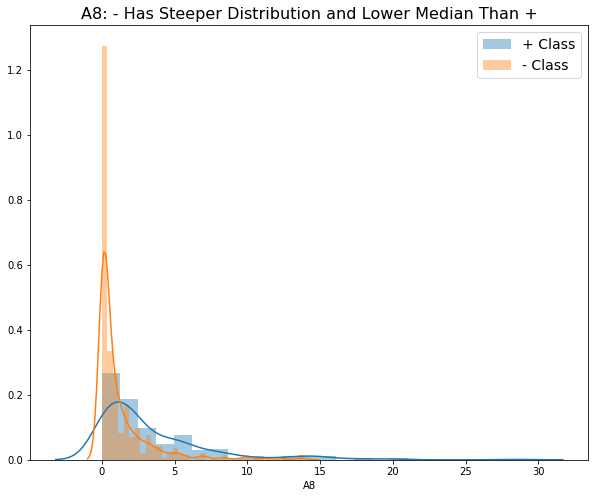

In [168]:
##VISUALIZATION

#A16 vs A8(continuous)
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(plus['A8'], label='+ Class');
sns.distplot(minus['A8'], label= '- Class');
ax.legend(fontsize=14)
plt.title('A8: - Has Steeper Distribution and Lower Median Than +', fontsize=16);

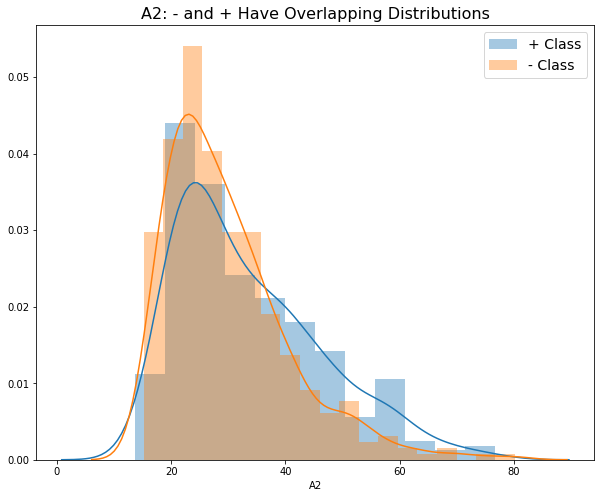

In [169]:
#A16 vs A2(continuous)
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(plus['A2'], label='+ Class');
sns.distplot(minus['A2'], label= '- Class');
ax.legend(fontsize=14)
plt.title('A2: - and + Have Overlapping Distributions', fontsize=16);

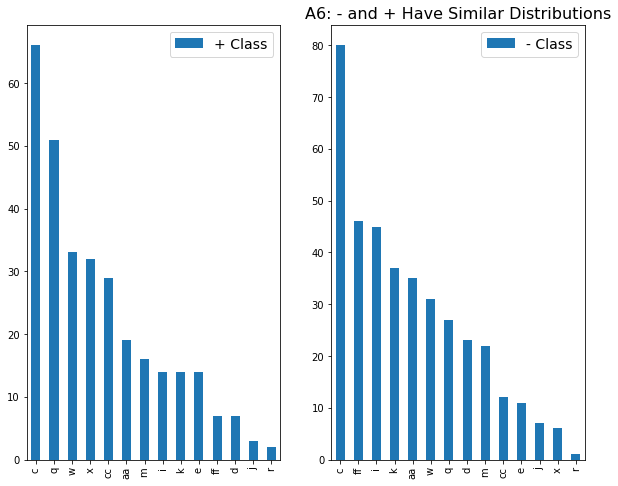

In [170]:
fig, ax = plt.subplots(1, 2, figsize=(10,8))
plus['A6'].value_counts().plot.bar(label='+ Class', ax = ax[0]);
minus['A6'].value_counts().plot.bar(label='- Class', ax = ax[1]);
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
plt.title('A6: - and + Have Similar Distributions', fontsize=16);

In [0]:
#separate columns into discrete and continuous
cont = list(df.columns[df.dtypes == 'float64'])[0:14] #removed class attribute
disc = list(df.columns[df.dtypes == 'O'])[0:14] #removed class attribute

In [0]:
#t testing
def t_test(col):
  #print attribute
  print(col)
  print('--------')
  #define and split by class attribute
  plus1 = plus[col]
  minus1 = minus[col]
  #calculate mean and st dev
  for p in [plus1, minus1]:
    print(f'Mean: {p.mean()}')
    print(f'St Dev: {p.std()}')
    print('--------')
  #run ttest, find tstat and pvalue
  tstat, pvalue = ttest_ind(plus1, minus1)
  print(f'T Score: {tstat}')
  print(f'P Value: {pvalue}')
  #print which party favors bill
  if pvalue < 0.01:
    if plus1.mean() >= minus1.mean():
      print('+ Has Higher Mean')
    else:
      print('- Has Higher Mean')
  if pvalue >= 0.01:
    print('No Significant Difference Between Class Attributes')
  print('--------\n\n\n--------')

In [179]:
#run t test on all continuous variables
for c in cont:
  t_test(c)

A2
--------
Mean: 33.68622149837134
St Dev: 12.77474548778078
--------
Mean: 29.77302872062663
St Dev: 10.777570718553125
--------
T Score: 4.363077327291086
P Value: 1.4791548583526188e-05
+ Has Higher Mean
--------


--------
A3
--------
Mean: 5.904951140065144
St Dev: 5.47148500121493
--------
Mean: 3.839947780678851
St Dev: 4.337661926894536
--------
T Score: 5.52998337614816
P Value: 4.551680702308068e-08
+ Has Higher Mean
--------


--------
A8
--------
Mean: 3.427899022801302
St Dev: 4.120792217075042
--------
Mean: 1.2579242819843346
St Dev: 2.120480642198284
--------
T Score: 8.935819983773698
P Value: 3.6710537401601785e-18
+ Has Higher Mean
--------


--------
A14
--------
Mean: 164.3355048859935
St Dev: 160.17801007552214
--------
Mean: 198.9738903394256
St Dev: 179.97237818099748
--------
T Score: -2.6373144115049745
P Value: 0.008545266735607758
- Has Higher Mean
--------


--------


In [0]:
##run chi squared on all categorical variables

#load function
def chi2_numpy(independent, dependent, dataframe):
#create contingency table
  contingency_table = pd.crosstab(dataframe[independent], dataframe[dependent], margins=True)
  row_sums = contingency_table.iloc[0:len(dataframe[independent].unique()), len(dataframe[dependent].unique())].values
  col_sums = contingency_table.iloc[len(dataframe[independent].unique()), 0:len(dataframe[dependent].unique())].values
  total = contingency_table.loc['All', 'All']
#create expected values contingency table
  expected = []
  for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
      expected_val = column*row_sums[i]/total
      expected_row.append(expected_val)
    expected.append(expected_row)
#append to array
  expected = np.array(expected)
  expected
  observed = pd.crosstab(dataframe[independent], dataframe[dependent]).values #contingency table values w/o margins
  chi_square = ((observed-expected)**2/(expected)).sum()
  print(d, chi_square)

In [181]:
for d in disc:
  chi2_numpy('A16', d, df)

A1 0.5776602937549434
A4 26.693701541461103
A5 26.693701541461103
A6 98.3232427121047
A7 45.018798363041775
A9 358.10032647163285
A10 144.9276762819937
A12 0.6900889348793988
A13 9.191570451545383
A16 690.0


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.


*   In all except one t-test I ran, + had a statistically significantly higher mean, which might imply that + correlates with higher means in the attributes they measured.
*   Attribute A9 has the highest goodness of fit value of all the Chi2 tests I ran, and A10 is the next strongest. This indicates that the class attribute has the strongest correlations with these two attributes.
*   The hardest part of this sprint challenge was incorporating functions and loops into the assignment. Also, I wasn't able to calculate p-values for chi-squared.



